In [1]:
import pandas as pd
import scipy as sp
from pylab import *
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
import collections
from IPython.display import clear_output
import random
import seaborn as sns

In [2]:
df = pd.read_csv('result.csv')

In [3]:
#df = df.sort_values(by=['p.value'])
#df = df.reset_index()
sig_ind = df.index[df['P.Value'] < 0.05].tolist()

In [4]:
sig_gene = df.loc[sig_ind,'Unnamed: 0'].tolist()
print(len(sig_gene))

72


In [5]:
df_ref = pd.read_excel('ref_male_DEG.xlsx')

In [6]:
ref_ind = df_ref.index[df_ref['Brain Region'] =='Anterior Insula'].tolist()

In [7]:
ref_gene = df_ref.loc[ref_ind,'ENSG'].tolist()

In [8]:
len(list(set(ref_gene) & set(sig_gene)))

4

In [9]:
df = pd.read_csv('collect.csv',index_col=1)
del df['Unnamed: 0']

In [10]:
countlist = df.sum(axis = 1,numeric_only=True)

In [11]:
countlist.sort_values(ascending = False)

name
ENSG00000180616    724.0
ENSG00000175426    699.0
ENSG00000199436    609.0
ENSG00000139318    429.0
ENSG00000172137    387.0
ENSG00000200243    368.0
ENSG00000201557    336.0
ENSG00000135324    306.0
ENSG00000204389    299.0
ENSG00000200726    291.0
ENSG00000197061    264.0
ENSG00000201136    260.0
ENSG00000200564    246.0
ENSG00000200087    244.0
ENSG00000199970    242.0
ENSG00000124134    238.0
ENSG00000111262    230.0
ENSG00000071575    225.0
ENSG00000005108    225.0
ENSG00000164326    219.0
ENSG00000104327    211.0
ENSG00000157502    199.0
ENSG00000200680    190.0
ENSG00000166086    189.0
ENSG00000100271    189.0
ENSG00000154096    188.0
ENSG00000202270    187.0
ENSG00000106236    183.0
ENSG00000201300    181.0
ENSG00000199575    180.0
                   ...  
ENSG00000180205      0.0
ENSG00000180209      0.0
ENSG00000180210      0.0
ENSG00000180211      0.0
ENSG00000180219      0.0
ENSG00000180221      0.0
ENSG00000180228      0.0
ENSG00000180229      0.0
ENSG00000180150     

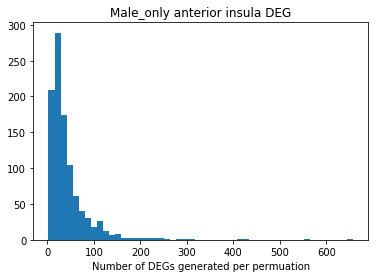

In [12]:
numDEGlist = df.sum(axis = 0,numeric_only=True)
ax1 = numDEGlist.hist(bins=50)
ax1.set_xlabel('Number of DEGs generated per permuation')
ax1.set_title('Male_only anterior insula DEG')
ax1.grid(b=None)

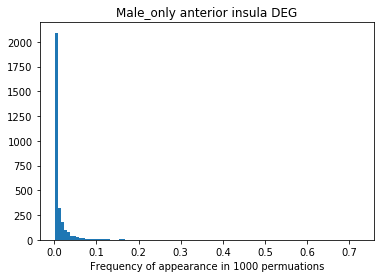

In [31]:
sig_gene_list = countlist[countlist>0]/1000
ax2 = sig_gene_list.hist(bins=100)
ax2.set_xlabel('Frequency of appearance in 1000 permuations')
ax2.set_title('Male_only anterior insula DEG')
ax2.grid(b=None)


C:\Users\weida\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Density')

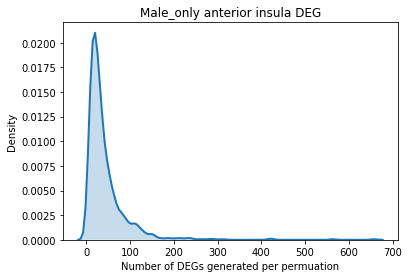

In [30]:
ax3 = sns.distplot(numDEGlist, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 2})
ax3.set_xlabel('Number of DEGs generated per permuation')
ax3.set_title('Male_only anterior insula DEG')
ax3.set_ylabel('Density')

Text(0.5, 1.0, 'Male_only anterior insula DEG')

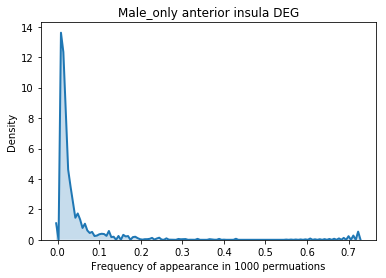

In [32]:
ax4 = sns.distplot(sig_gene_list, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 2})
ax4.set_xlabel('Frequency of appearance in 1000 permuations')
ax4.set_ylabel('Density')
ax4.set_title('Male_only anterior insula DEG')

In [156]:
most_sig_gene = countlist[countlist>300]
len(most_sig_gene)

8

In [157]:
sig_gene = most_sig_gene.index.tolist()
len(list(set(ref_gene) & set(sig_gene)))

3

In [23]:
sig_gene_list

name
ENSG00000000419    0.003
ENSG00000001461    0.008
ENSG00000001561    0.036
ENSG00000001631    0.002
ENSG00000003056    0.010
ENSG00000003147    0.001
ENSG00000004766    0.003
ENSG00000004799    0.028
ENSG00000004897    0.001
ENSG00000005108    0.225
ENSG00000005249    0.001
ENSG00000005339    0.006
ENSG00000005379    0.017
ENSG00000005486    0.003
ENSG00000005700    0.002
ENSG00000005812    0.003
ENSG00000005893    0.008
ENSG00000006007    0.003
ENSG00000006128    0.031
ENSG00000006468    0.057
ENSG00000006625    0.002
ENSG00000006652    0.111
ENSG00000006715    0.012
ENSG00000006831    0.061
ENSG00000007168    0.003
ENSG00000007516    0.008
ENSG00000007520    0.015
ENSG00000007944    0.113
ENSG00000008018    0.001
ENSG00000008056    0.024
                   ...  
ENSG00000207863    0.006
ENSG00000208772    0.017
ENSG00000208892    0.027
ENSG00000209082    0.092
ENSG00000209702    0.027
ENSG00000210049    0.016
ENSG00000210077    0.025
ENSG00000210082    0.005
ENSG00000210112    0